In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_cars = pd.read_csv('carst.csv')
df_cars.head()

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0


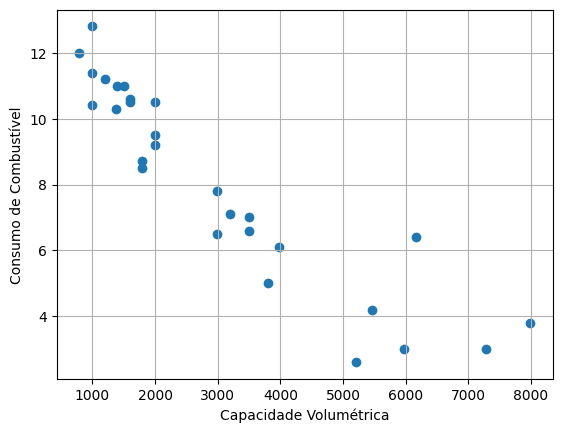

In [9]:
plt.scatter(df_cars['cap_vol'], df_cars['consumo'])
plt.xlabel('Capacidade Volumétrica')
plt.ylabel('Consumo de Combustível')
plt.grid(True)
plt.show()

In [53]:
soma_x = df_cars['cap_vol'].sum()
soma_y = df_cars['consumo'].sum()
soma_xy = (df_cars['cap_vol']*df_cars['consumo']).sum()
soma_x2 = (df_cars['cap_vol']*df_cars['cap_vol']).sum()
soma_y2 = (df_cars['consumo']*df_cars['consumo']).sum()
x_medio = df_cars['cap_vol'].mean()
y_medio = df_cars['consumo'].mean()

S_xx = soma_x2 - soma_x**2/len(df_cars)
S_xy = soma_xy - soma_x*soma_y/len(df_cars)
S_yy = soma_y2 - soma_y**2/len(df_cars)
beta_1 = S_xy/S_xx
beta_0 = y_medio - beta_1*x_medio

print(soma_x, soma_y, soma_xy, soma_x2, soma_y2, x_medio, y_medio)
print(S_xx, S_xy, S_yy, beta_1, beta_0)

84084 226.7 528830.6 365239312 2081.2500000000005 3003.0 8.096428571428572
112735060.0 -151949.5 245.7896428571437 -0.0013478460028317721 12.144010117932384


In [20]:
print(np.corrcoef(df_cars['cap_vol'], df_cars['consumo']))
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_cars['cap_vol'], df_cars['consumo'])
print(intercept, slope, r_value, p_value, std_err)

[[ 1.         -0.91282597]
 [-0.91282597  1.        ]]
12.144010117932384 -0.0013478460028317721 -0.9128259670789566 1.299121822295857e-11 0.00011824884667786779


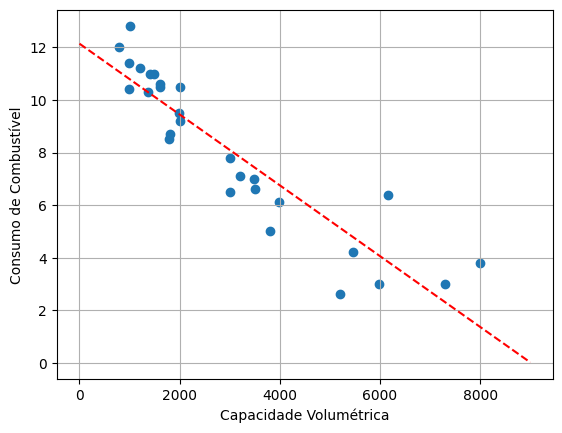

In [24]:
plt.scatter(df_cars['cap_vol'], df_cars['consumo'])
plt.xlabel('Capacidade Volumétrica')
plt.ylabel('Consumo de Combustível')
x = np.array([0, 9000])
y = intercept + x * slope
plt.plot(x, y, color='red', linestyle='--')  
plt.grid(True)
plt.show()

In [29]:
valor_esperado_3000 = slope * 3000 + intercept
print("Valor esperado para 3000: ", format(valor_esperado_3000, '.3f'))

Valor esperado para 3000:  8.100


In [55]:
y_esperado = intercept + slope * df_cars['cap_vol']
residuos = df_cars['consumo'] - y_esperado
residuos_quadrado = residuos ** 2
SQE_1 = residuos_quadrado.sum()
SQE_2 = S_yy - beta_1 * S_xy
print('SQE_1 =', SQE_1, '\nSQE_2 =', SQE_2)
n = len(df_cars)
s2_variancia_esperada = SQE_1 / (n - 2)
s_desvio_padrao = np.sqrt(s2_variancia_esperada)

print('s2 = ', s2_variancia_esperada, '\ns = ', s_desvio_padrao)

SQE_1 = 40.98511664985651 
SQE_2 = 40.98511664985733
s2 =  1.5763506403790966 
s =  1.2555280324943352


In [101]:
print('SQE = ', SQE_1)
SQT = S_yy
print('SQT = ', SQT)
SQR = SQT - SQE_1
print('SQR = ', SQR)
r2 = 1 - SQE_1/SQT
print('r2 = ', r2)
r = np.sqrt(r2)
print('r = ', r)

SQE =  40.98511664985651
SQT =  245.7896428571437
SQR =  204.80452620728718
r2 =  0.833251246173633
r =  0.9128259670789569


In [69]:
# Calcular intervalo de confiança
s_beta_1 = s_desvio_padrao / np.sqrt(S_xx) # desvio padrão da inclinação da reta
print('s_beta_1 (desvio padrão de inclinação da reta) =', format(s_beta_1, '.5E'))

# Intervalo de confiança para beta_1
t_student = stats.t.ppf(0.975, df = n - 2) # t de student para 95% de confiança e n - 2 graus de liberdade
print('t_student =', format(t_student, '.3f'))

s_beta_1 (desvio padrão de inclinação da reta) = 1.18249E-04
t_student = 2.056


bet_1_up:  -0.0011861565760238732
bet_1_down:  -0.001672284546887722


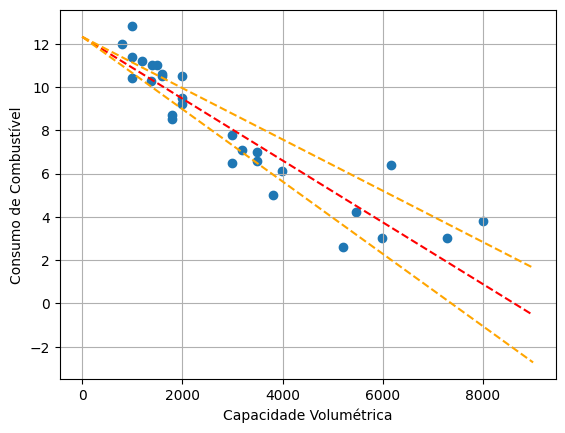

In [102]:
plt.scatter(df_cars['cap_vol'], df_cars['consumo'])
plt.xlabel('Capacidade Volumétrica')
plt.ylabel('Consumo de Combustível')
x = np.array([0, 9000])
y = intercept + x * slope

slope_up = slope + t_student * s_beta_1
print('bet_1_up: ', slope_up)
slope_down = slope - t_student * s_beta_1
print('bet_1_down: ', slope_down)

y_up = intercept + x * slope_up
y_down = intercept + x * slope_down

plt.plot(x, y, color='red', linestyle='--')
plt.plot(x, y_up, color='orange', linestyle='--') 
plt.plot(x, y_down, color='orange', linestyle='--') 
plt.grid(True)
plt.show()

In [73]:
df1 = pd.DataFrame(data = df_cars)
c0 = df1['brand/model/year']
c1 = df1['cap_vol']
c2 = df1['consumo']
c3 = df1['power']
c4 = df1['weight']
c5 = df1['cemm']
c6 = df1['nu_cy']
c7 = df1['Etype']

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


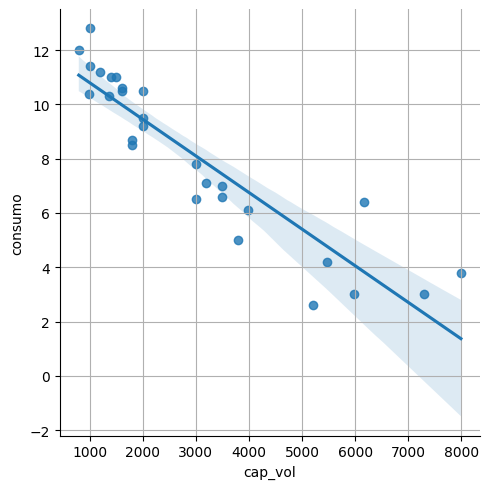

In [92]:
sns.lmplot(x='cap_vol', y='consumo', data=df1)
plt.grid(True)

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


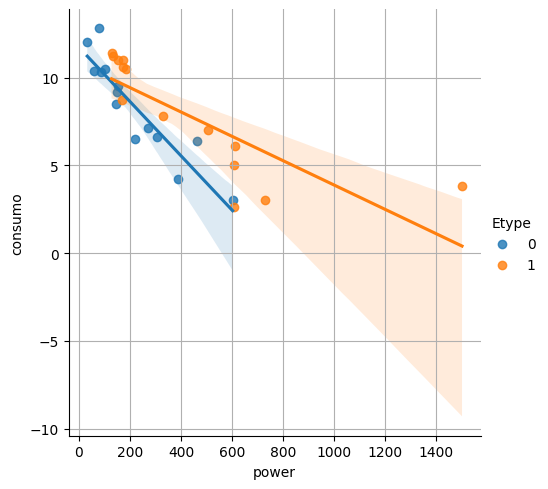

In [98]:
sns.lmplot(x='power', y='consumo',hue='Etype', data=df1)
plt.grid(True)

In [96]:
df_aspirado = df_cars[df_cars['Etype'] == 0]
df_turbo = df_cars[df_cars['Etype'] == 1]

slope, intercept, r_value, p_value, std_err = stats.linregress(df_cars['cap_vol'], df_cars['consumo'])
print(slope, intercept, r_value, p_value, std_err)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_aspirado['cap_vol'], df_aspirado['consumo'])
print(slope, intercept, r_value, p_value, std_err)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_turbo['cap_vol'], df_turbo['consumo'])
print(slope, intercept, r_value, p_value, std_err)

-0.0013478460028317721 12.144010117932384 -0.9128259670789566 1.299121822295857e-11 0.00011824884667786779
-0.0012593116220535792 11.968578736702081 -0.9132852959692409 5.080975166144984e-06 0.00016213335250984926
-0.0014292205614557976 12.32091466911146 -0.9151078358450709 4.491084375352328e-06 0.00018178865548904268


##### Exercício 1

In [124]:
df_EX01 = pd.read_csv('Aula02_Ex01.csv', sep=';')
df_EX01['Despesas'] = df_EX01['Despesas']*1000
df_EX01['Vendas'] = df_EX01['Vendas'] * 10000
slope, intercept, r_value, p_value, std_err = stats.linregress(df_EX01['Despesas'],df_EX01['Vendas'])
print('Equação da Reta: Vendas = Despesas * ',slope," + ",intercept)
Venda_Esperada_12000 = slope * 12000 + intercept
print('Venda Esperada para 12.000 de Despesas em Marketing: ', format(Venda_Esperada_12000,'.0f'))
print('Coeficiente de Determinação: ',r_value)


Equação da Reta: Vendas = Despesas *  17.34502923976608  +  31076.023391812865
Venda Esperada para 12.000 de Despesas em Marketing:  239216
Coeficiente de Determinação:  0.9418333636701189


##### Exercício 2

In [133]:
soma_x = 81300
soma_y = 240.4
S_yy = 73.71
S_xy = -41526
S_xx = 25945500
n = 20
# Determinando os coeficientes da reta
x_medio = soma_x/n
y_medio = soma_y/n
beta_1 = S_xy/S_xx
beta_0 = y_medio - beta_1*x_medio
print('Equação da Reta: Consumo de Combustível (km/h) = Rotação do Motor (RPM) * ',beta_1," + ",beta_0)
coeficiente_correlacao = S_xy/(np.sqrt(S_xx*S_yy))
print('Coeficiente de Correlação: ',coeficiente_correlacao)

# Determinando o intervalo de confiança para o coeficiente angular (confiança de 95%)
S_quadrado = (S_yy - beta_1*S_xy)/(n-2)
S_R = np.sqrt(S_quadrado)
t_student = stats.t.ppf(0.975, n-2)
erro_beta_1 = t_student*S_R/np.sqrt(S_xx)
print('Intervalo de Confiança para o Coeficiente Angular: [',beta_1 - erro_beta_1,',',beta_1 + erro_beta_1,']')
erro_beta_0 = t_student*S_R*np.sqrt(1/n + x_medio**2/S_xx)
print('Intervalo de Confiança para o Coeficiente Linear: ',beta_0,"+-",erro_beta_0)

Equação da Reta: Consumo de Combustível (km/h) = Rotação do Motor (RPM) *  -0.001600508758744291  +  18.526068104295543
Coeficiente de Correlação:  -0.9495675651511465
Intervalo de Confiança para o Coeficiente Angular: [ -0.001862224582460743 , -0.001338792935027839 ]
Intervalo de Confiança para o Coeficiente Linear:  18.526068104295543 +- 1.1048469190951247
